<a href="https://colab.research.google.com/github/girotodenis/python/blob/master/RelatorioTesteCarga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
%%capture
from math import trunc
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt   
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
%matplotlib inline  

py.init_notebook_mode(connected=False)

In [157]:
df = pd.read_csv('/content/acesso_prod_tempo_dia_14_mes_11.csv')
df['SEGUNDO'] = df['SEGUNDO'].apply(trunc)
df['hour_min'] = 'H'+df['HORA'].astype(dtype='str') + 'M'+df['MINUTO'].astype(dtype='str')
df['hour_sec'] = 'H'+df['HORA'].astype(dtype='str') + 'M'+df['MINUTO'].astype(dtype='str')+ 'S'+df['SEGUNDO'].astype(dtype='str')
df = df.sort_values(['HORA','MINUTO','SEGUNDO'],ascending = (True,True,True))
print(df.shape)
df.head()



(4067254, 9)


,DIA,HORA,MINUTO,SEGUNDO,NO_LOGIN_REQUISITANTE,URL,VL_TEMPO_REQUISICAO,hour_min,hour_sec
0,24,0,0,1,lieberenz.fsl,/usuario,1,H0M0,H0M0S1
1,24,0,0,1,lieberenz.fsl,/casoNovo/,115,H0M0,H0M0S1
2,24,0,0,1,lieberenz.fsl,/caso//conduta?pagina=&resultadosPorPagina=,6,H0M0,H0M0S1
3,24,0,0,1,lieberenz.fsl,/casoNovo/pendentes,4,H0M0,H0M0S1
4,24,0,0,2,lieberenz.fsl,/casoNovo/,121,H0M0,H0M0S2


(4067254, 9)


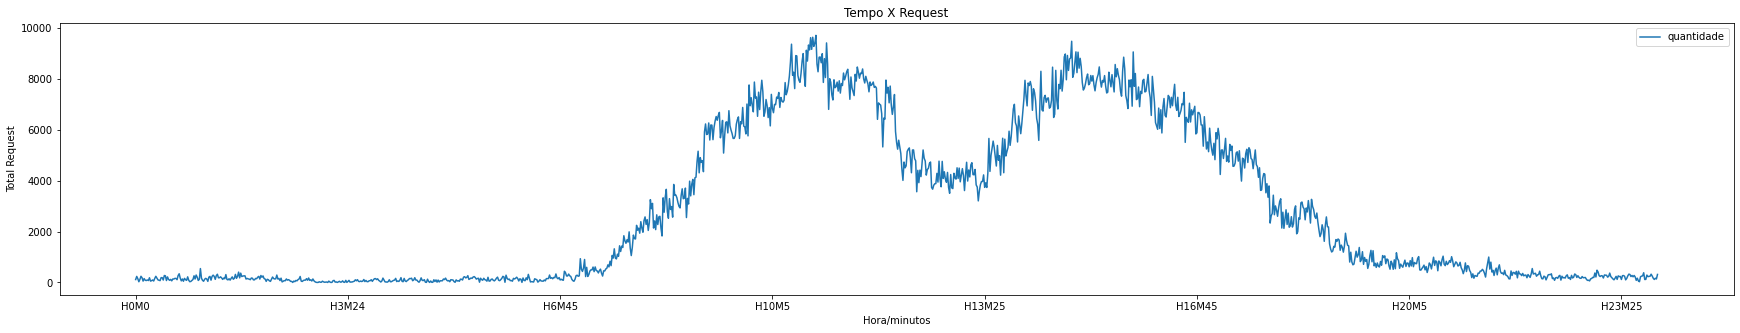

In [158]:
dft = df # df[((df['HORA']>=7)&(df['HORA']<20))]
print(dft.shape)

df2 = dft.groupby(['HORA','MINUTO','hour_min']).size().reset_index(name='quantidade').sort_values(['HORA','MINUTO'],ascending = (True,True))
fig, ax = plt.subplots(figsize=(30,5))
ax = df2.plot(ax=ax, kind='line', x='hour_min', y='quantidade', xlabel="Hora/minutos", ylabel="Total Request", title="Tempo X Request")
plt.legend(loc='best')
plt.show()



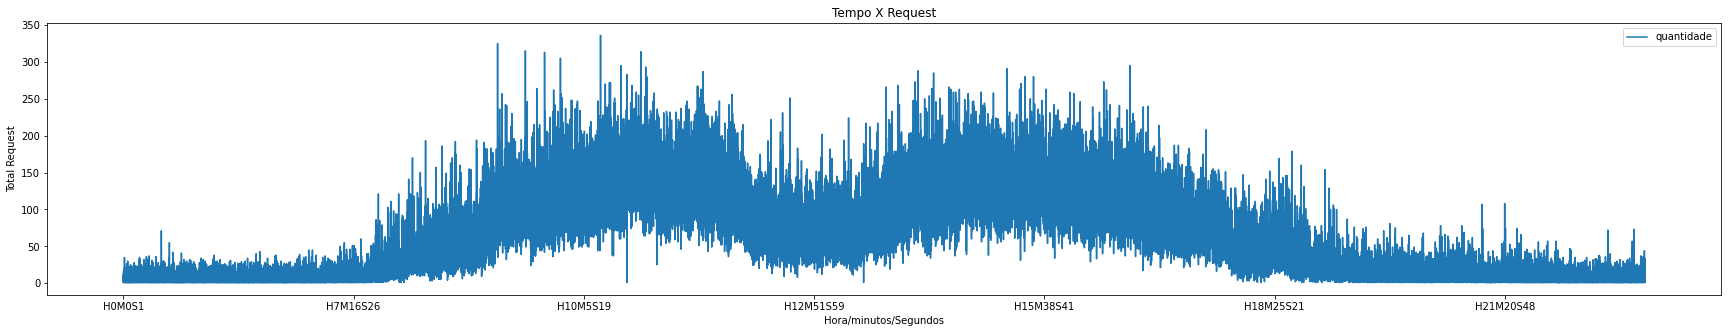

In [159]:
df2 = df.groupby(['HORA','MINUTO','SEGUNDO','hour_sec']).size().reset_index(name='quantidade').sort_values(['HORA','MINUTO','SEGUNDO'],ascending = (True,True,True))
fig, ax = plt.subplots(figsize=(30,5))
ax = df2.plot(ax=ax, kind='line', x='hour_sec', y='quantidade', xlabel="Hora/minutos/Segundos", ylabel="Total Request", title="Tempo X Request")
plt.legend(loc='best')
plt.show()

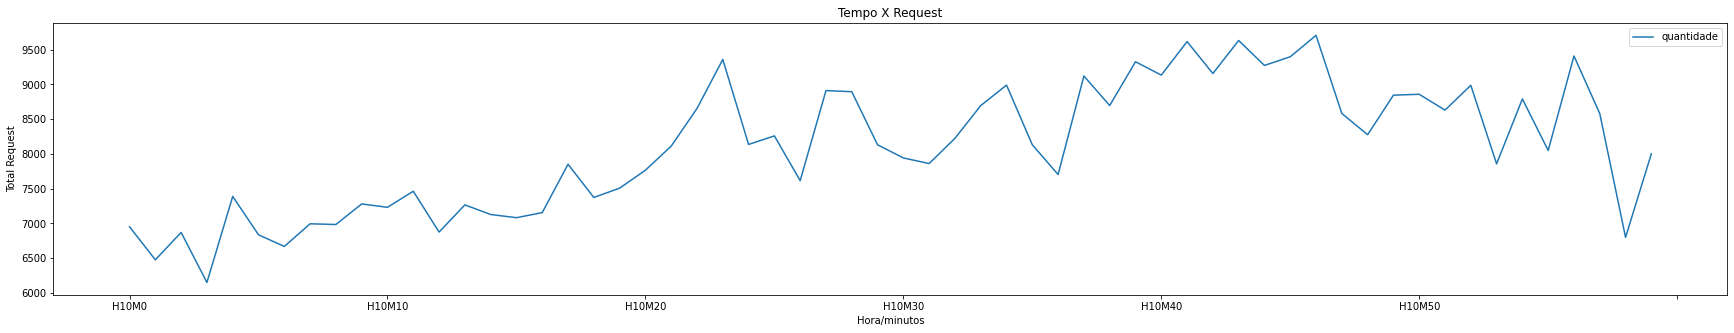

In [160]:
dft = df[((df['HORA']>=10)&(df['HORA']<11))]

df2 = dft.groupby(['HORA','MINUTO','hour_min']).size().reset_index(name='quantidade').sort_values(['HORA','MINUTO'],ascending = (True,True))
fig, ax = plt.subplots(figsize=(30,5))
ax = df2.plot(ax=ax, kind='line', x='hour_min', y='quantidade', xlabel="Hora/minutos", ylabel="Total Request", title="Tempo X Request")
plt.legend(loc='best')
plt.show()


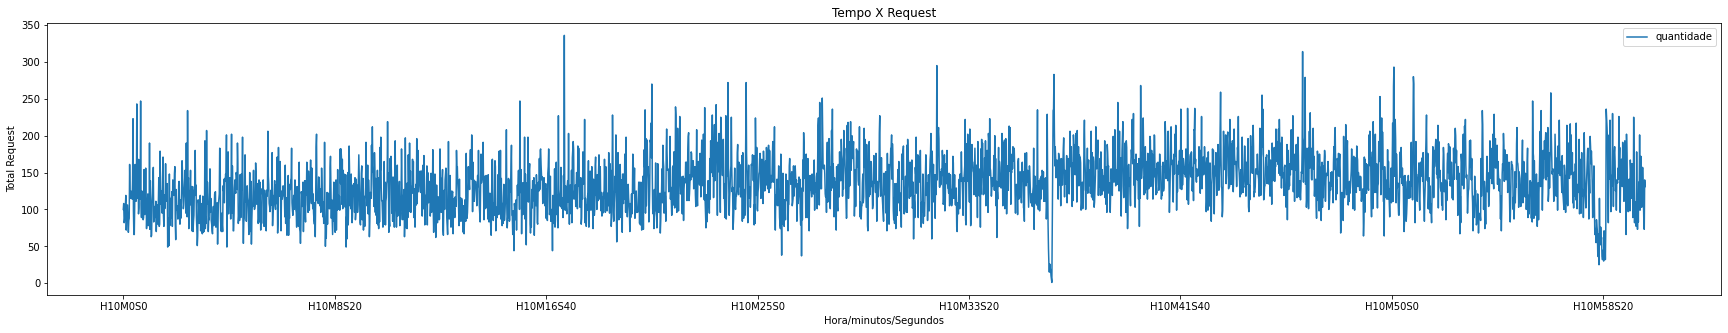

In [161]:
df2 = dft.groupby(['HORA','MINUTO','SEGUNDO','hour_sec']).size().reset_index(name='quantidade').sort_values(['HORA','MINUTO','SEGUNDO'],ascending = (True,True,True))
fig, ax = plt.subplots(figsize=(30,5))
ax = df2.plot(ax=ax, kind='line', x='hour_sec', y='quantidade', xlabel="Hora/minutos/Segundos", ylabel="Total Request", title="Tempo X Request")
plt.legend(loc='best')
plt.show()

In [162]:

#df = pd.read_csv('/content/epol-teste-consultas-menu.csv')
df1 = pd.read_csv('/content/epol-teste-consultas-menu_01.csv')
df2 = pd.read_csv('/content/epol-teste-consultas-menu_02.csv')
df = pd.concat([df1, df2])

df['time'] = df['timeStamp'].values.astype(dtype='datetime64[ms]')
df['day'] = df['time'].dt.day.astype(dtype='int')
df['hour'] = df['time'].dt.hour.astype(dtype='int')
df['minute'] = df['time'].dt.minute.astype(dtype='int')
df['second'] = df['time'].dt.second.astype(dtype='int')
df['hour_min'] = 'D'+df['time'].dt.day.astype(dtype='str') +'H'+df['time'].dt.hour.astype(dtype='str') + '_M'+df['time'].dt.minute.astype(dtype='str')
df['hour_sec'] = 'D'+df['time'].dt.day.astype(dtype='str') +'H'+df['time'].dt.hour.astype(dtype='str') + '_M'+df['time'].dt.minute.astype(dtype='str')+ '_S'+df['time'].dt.second.astype(dtype='str')

df = df.sort_values(['day','hour','minute','second'],ascending = (True,True,True,True))
#df.columns

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



In [163]:
print(df.shape)
df.head(5)

(355085, 24)


,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect,time,day,hour,minute,second,hour_min,hour_sec
4,1639093709752,1787,Login,200,OK,Thread Group 1-5,text,True,NaN,3678,466,224,224,https://sistemashom.dpf.gov.br/auth/realms/sis...,1787,0,903,2021-12-09 23:48:29.752,9,23,48,29,D9H23_M48,D9H23_M48_S29
5,1639093709788,1771,Login,200,OK,Thread Group 1-21,text,True,NaN,3650,463,224,224,https://sistemashom.dpf.gov.br/auth/realms/sis...,1771,0,876,2021-12-09 23:48:29.788,9,23,48,29,D9H23_M48,D9H23_M48_S29
7,1639093709880,1725,Login,200,OK,Thread Group 1-26,text,True,NaN,3676,466,232,232,https://sistemashom.dpf.gov.br/auth/realms/sis...,1725,0,779,2021-12-09 23:48:29.880,9,23,48,29,D9H23_M48,D9H23_M48_S29
12,1639093709981,1659,Login,200,OK,Thread Group 1-36,text,True,NaN,3719,469,236,236,https://sistemashom.dpf.gov.br/auth/realms/sis...,1659,0,686,2021-12-09 23:48:29.981,9,23,48,29,D9H23_M48,D9H23_M48_S29
13,1639093709757,1884,Login,200,OK,Thread Group 1-7,text,True,NaN,3676,466,237,237,https://sistemashom.dpf.gov.br/auth/realms/sis...,1884,0,908,2021-12-09 23:48:29.757,9,23,48,29,D9H23_M48,D9H23_M48_S29


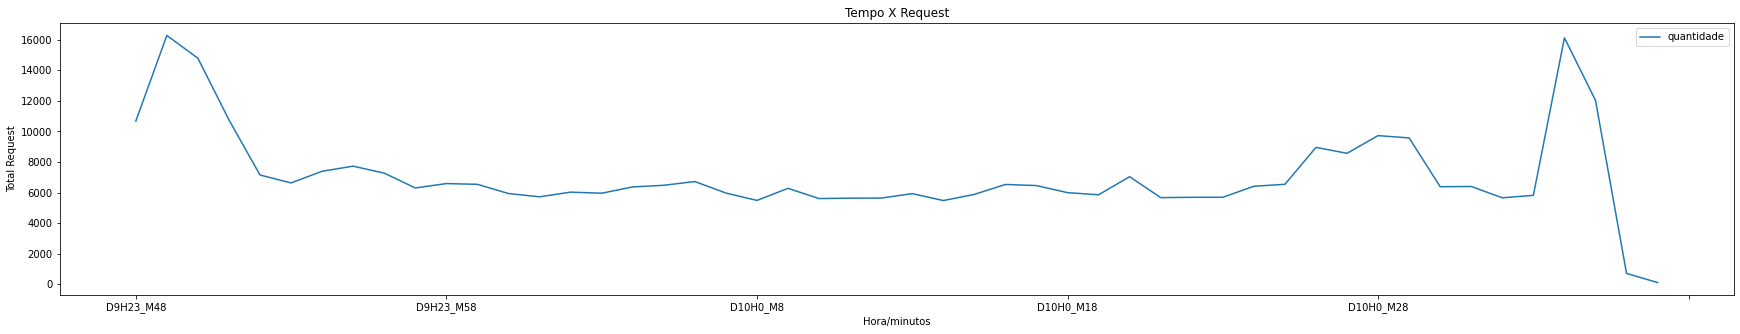

In [164]:
df2 = df.groupby(['day','hour','minute','hour_min']).size().reset_index(name='quantidade').sort_values(['day','hour','minute'],ascending = (True,True,True))
fig, ax = plt.subplots(figsize=(30,5))
ax = df2.plot(ax=ax, kind='line', x='hour_min', y='quantidade', xlabel="Hora/minutos", ylabel="Total Request", title="Tempo X Request")
plt.legend(loc='best')
plt.show()

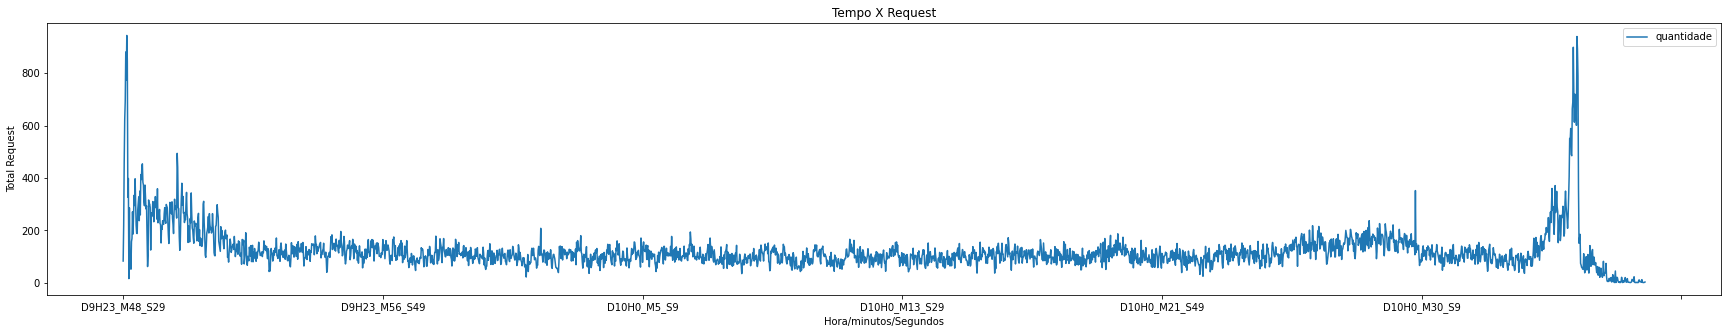

In [165]:

df2 = df.groupby(['day','hour','minute','second','hour_sec']).size().reset_index(name='quantidade').sort_values(['day','hour','minute','second'],ascending = (True,True,True,True))
fig, ax = plt.subplots(figsize=(30,5))
ax = df2.plot(ax=ax, kind='line', x='hour_sec', y='quantidade', xlabel="Hora/minutos/Segundos", ylabel="Total Request", title="Tempo X Request")
plt.legend(loc='best')
plt.show()

In [166]:
print(df.shape)
print(dft.shape)
dft = df[((df['minute']>=36) & (df['minute']>36)) ]
print(dft.shape)
df2 = dft.groupby(['label']).size().reset_index(name='quantidade').sort_values(['quantidade'],ascending = (False))
df2

(355085, 24)
(485635, 9)
(108206, 24)


,label,quantidade
19,Login,6000
44,Minhas Colunas Desmarcadas,2312
41,Meus Casos (primeira página),2291
10,Contador Pendentes na Unidade,2273
12,Estados do Brasil,2254
...,...,...
26,Meu Caso (peca assinadas),701
5,2 Meu Caso (documento),692
23,Meu Caso (documento),663
32,Meu Usuário 2,619


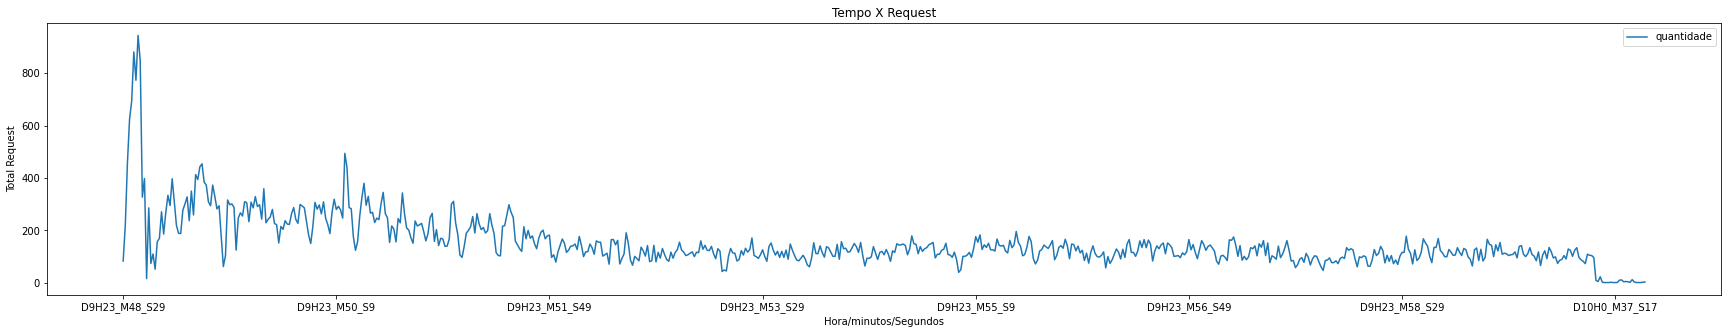

In [167]:
df2 = dft.groupby(['day','hour','minute','second','hour_sec']).size().reset_index(name='quantidade').sort_values(['day','hour','minute','second'],ascending = (True,True,True,True))
fig, ax = plt.subplots(figsize=(30,5))
ax = df2.plot(ax=ax, kind='line', x='hour_sec', y='quantidade', xlabel="Hora/minutos/Segundos", ylabel="Total Request", title="Tempo X Request")
plt.legend(loc='best')
plt.show()

In [168]:
df2 = df.groupby(['success']).size().reset_index(name='counts')
#df2.head()

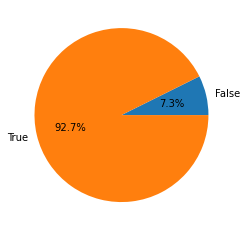

In [169]:
plt.pie(x=df2.counts, labels=df2.success, autopct='%1.1f%%')
plt.show()

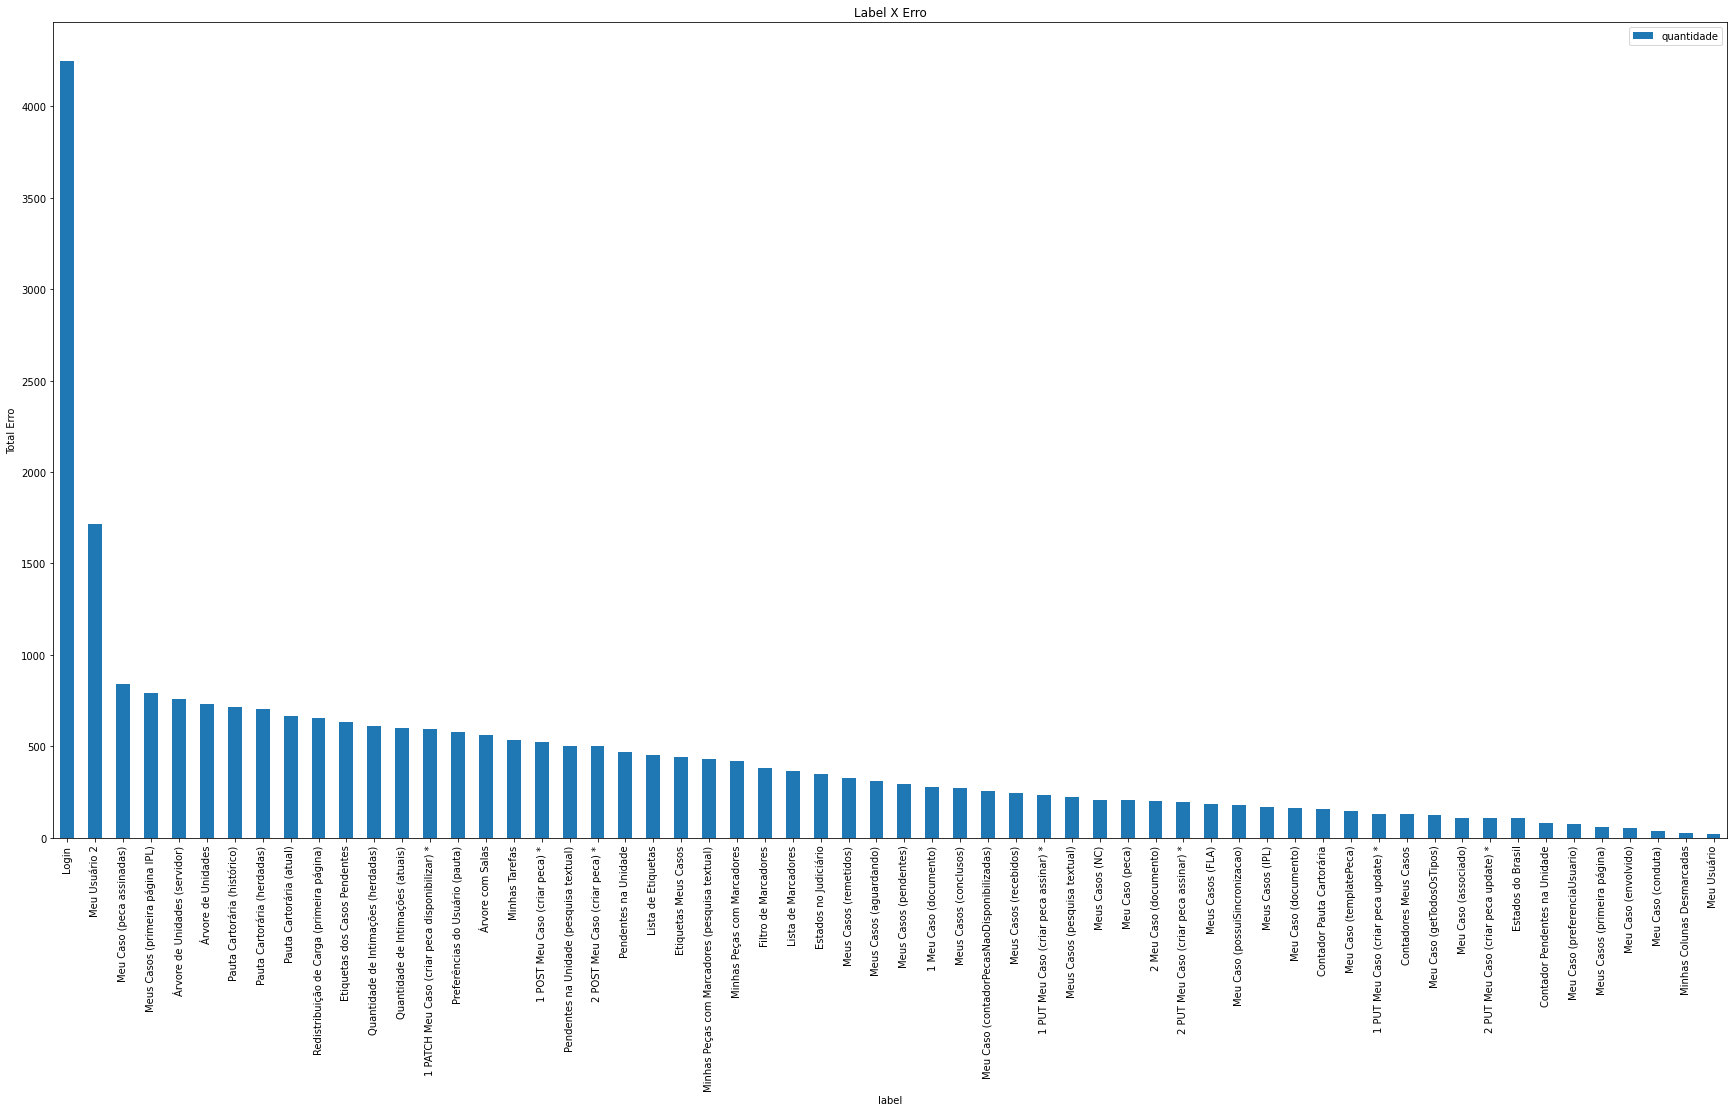

In [170]:
dft= df[(df['success']==False)]
df2 = dft.groupby(['label','success']).size().reset_index(name='quantidade')
df2 = df2.sort_values(['quantidade'],ascending = (False))
df2.plot(kind='bar', x='label', xlabel="label", ylabel="Total Erro", title="Label X Erro", figsize=(30,15))
#df2 = df2[(df['success']=='False')].sort_values(['quantidade'],ascending = (False))
#df2.plot(kind='bar', x='label', xlabel="label", ylabel="Total Erro", title="Label X Erro")

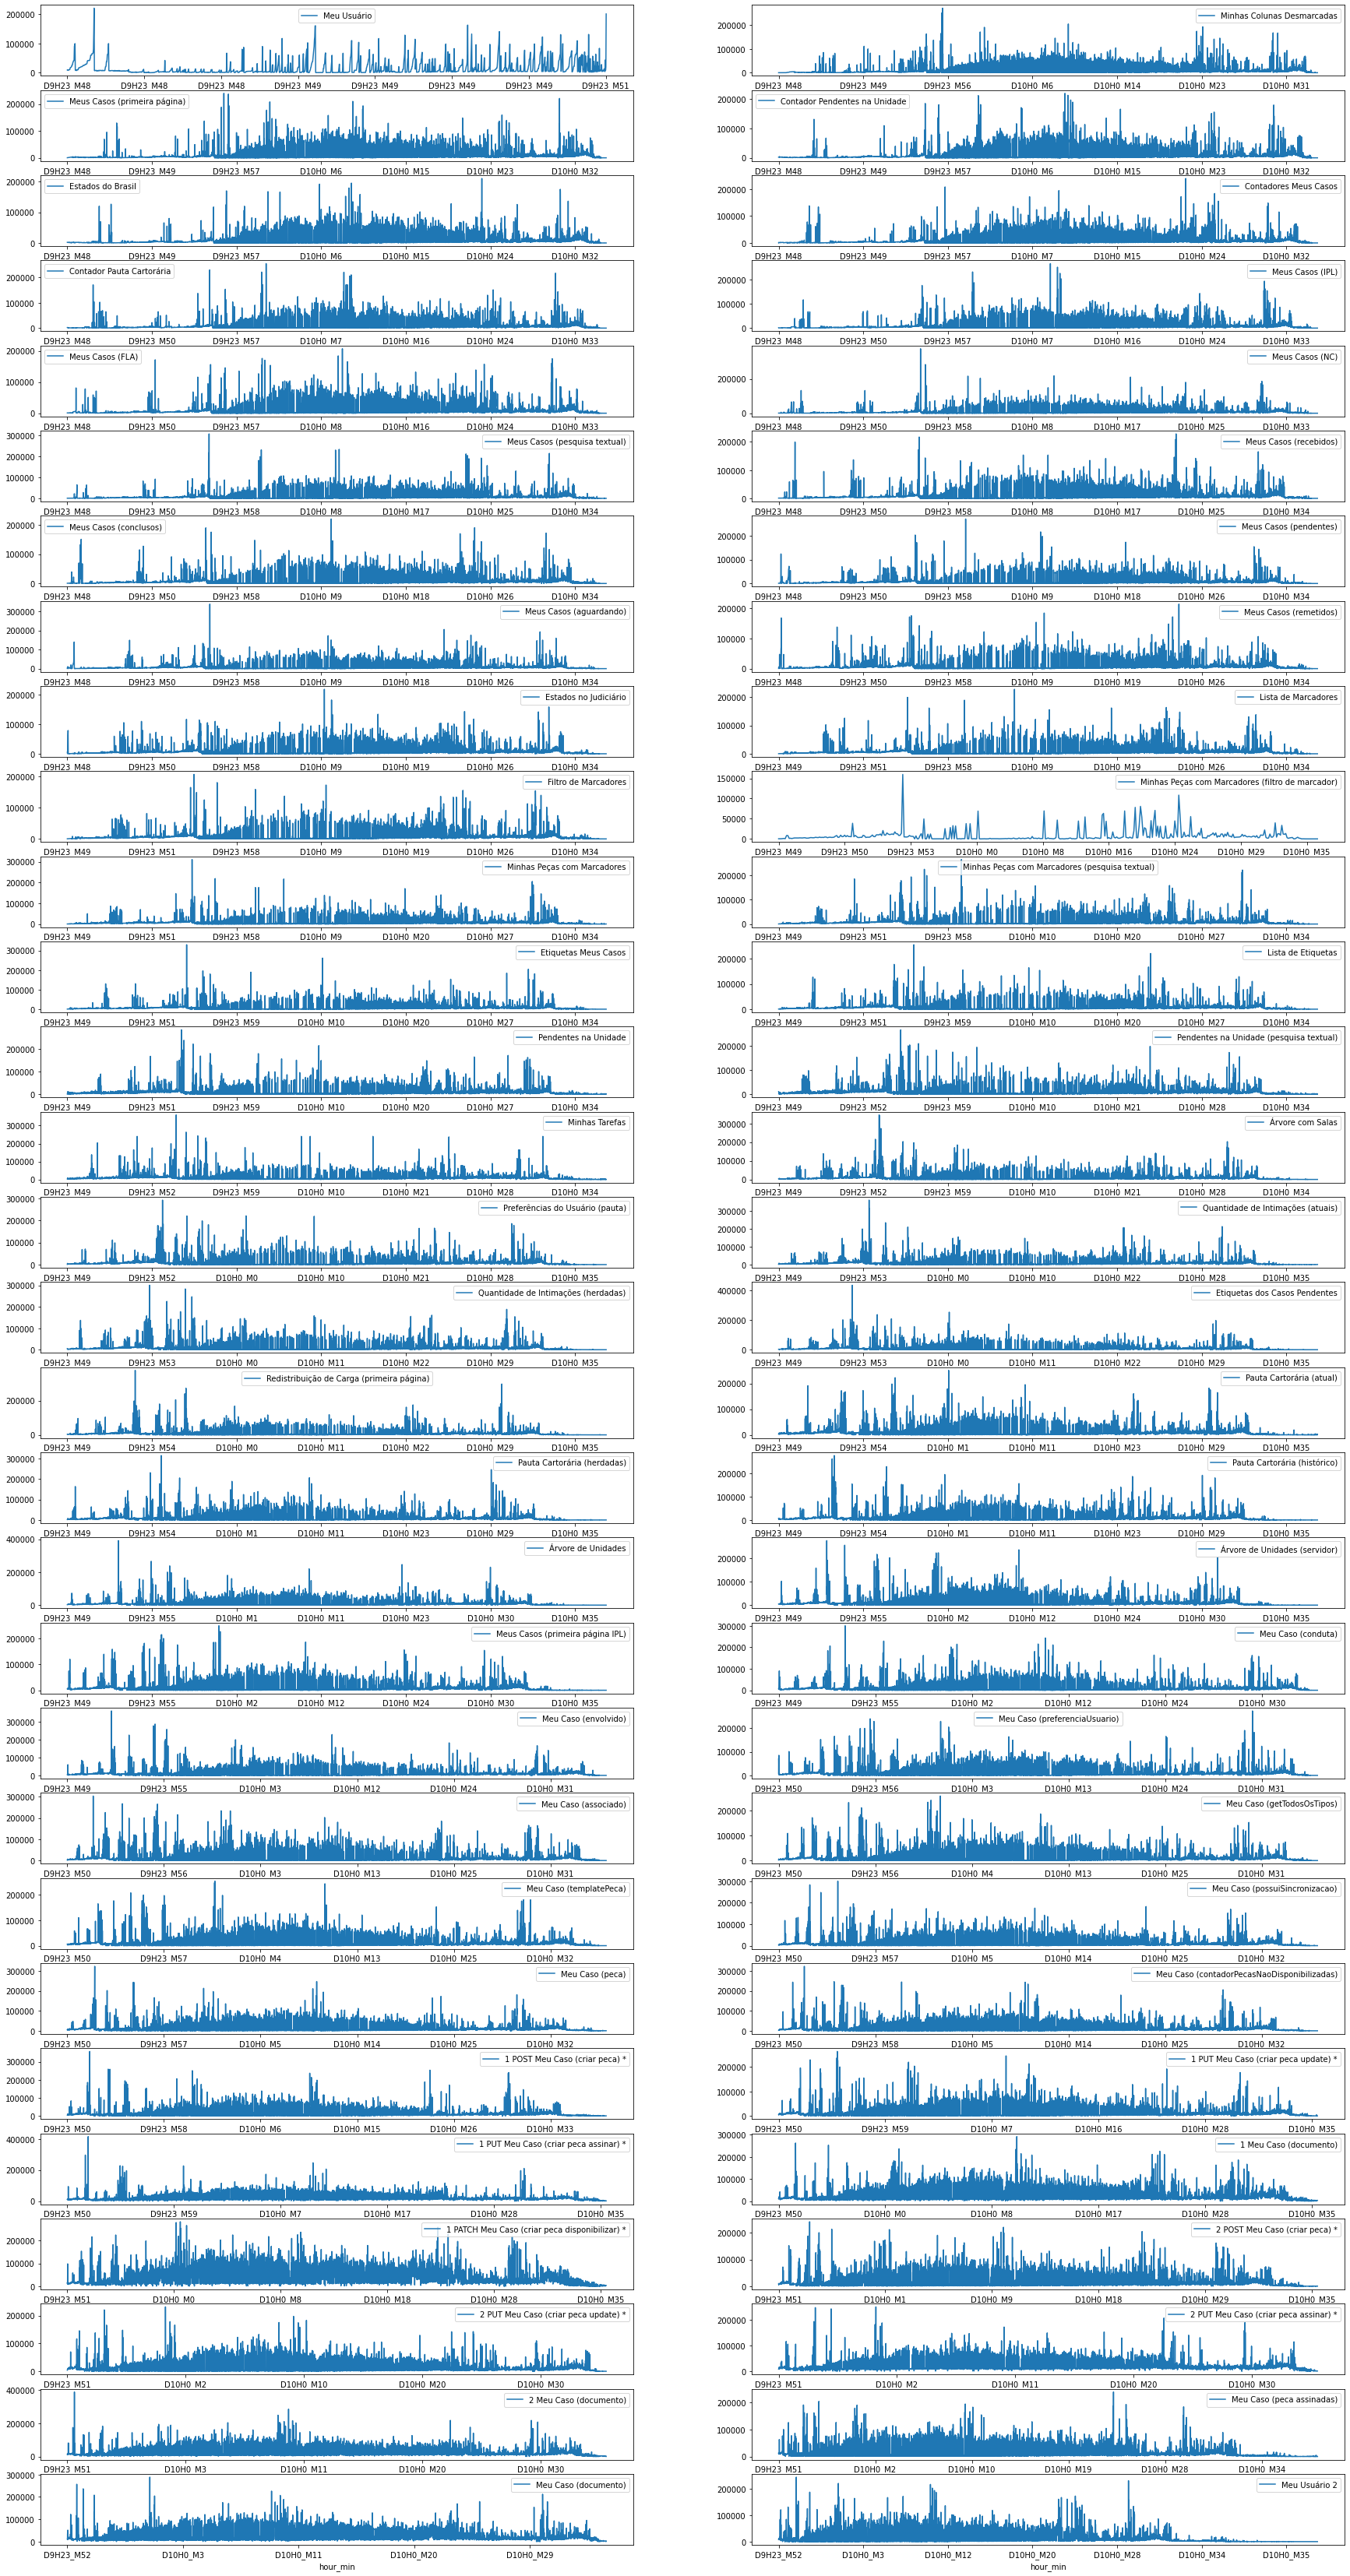

In [171]:
nrow=30
ncol=2
fig, axes = plt.subplots(nrow, ncol, figsize=(30,60))
count=1
for r in range(nrow):
    for c in range(ncol):
          #df[df['label']==df.label.unique()[count]].plot(ax=axes[r,c], kind='scatter', x='hour_min', y='Latency', label=df.label.unique()[count])
          df[df['label']==df.label.unique()[count]].plot(ax=axes[r,c], kind='line', x='hour_min', y='Latency', label=df.label.unique()[count])
          count+=1


In [172]:
#fig, ax = plt.subplots(figsize=(20,10))
#for key, grp in amostra.groupby(['label']):
#    ax = grp.plot(ax=ax, kind='scatter', x='timeStamp',c=np.random.rand(len(value_list),), y='Latency',marker="s", label=key)
#plt.legend(loc='best')
#plt.show()

In [173]:
df1 = pd.read_csv('/content/epol-teste-consultas-menu4x3000_1.csv')
df2 = pd.read_csv('/content/epol-teste-consultas-menu4x3000_2.csv')
df3 = pd.read_csv('/content/epol-teste-consultas-menu4x3000_3.csv')
df4 = pd.read_csv('/content/epol-teste-consultas-menu4x3000_4.csv')
df = pd.concat([df1, df2, df3, df4])

df.success.astype(str)
df.success.replace('False','false')
df.success.replace('f','false')
df.success.replace('True	','true	')
df['time'] = df['timeStamp'].values.astype(dtype='datetime64[ms]')
df['hour_min'] = df['time'].dt.hour.astype(dtype='str') + df['time'].dt.minute.astype(dtype='str')
df['minute'] = df['time'].dt.minute
df = df.sort_values(['timeStamp','label'],ascending = (True, True))
#df.columns

FileNotFoundError: ignored

In [ ]:
print(df.shape)
#df.head(1)

In [ ]:
df2 = df.groupby(['hour_min']).size().reset_index(name='quantidade')
fig, ax = plt.subplots(figsize=(10,5))
ax = df2.plot(ax=ax, kind='line', x='hour_min', y='quantidade', xlabel="Hora/minutos", ylabel="Total Request", title="Tempo X Request")
plt.legend(loc='best')
plt.show()

In [ ]:
df2 = df.groupby(['success']).size().reset_index(name='counts')
#df2.head()

In [ ]:
plt.pie(x=df2.counts, labels=df2.success, autopct='%1.1f%%')
plt.show()

In [ ]:
nrow=30
ncol=2
fig, axes = plt.subplots(nrow, ncol, figsize=(15,60))

count=1
for r in range(nrow):
    for c in range(ncol):
          #df[df['label']==df.label.unique()[count]].plot(ax=axes[r,c], kind='scatter', x='hour_min', y='Latency', label=df.label.unique()[count])
          df[df['label']==df.label.unique()[count]].plot(ax=axes[r,c], kind='line', x='hour_min', y='Latency', label=df.label.unique()[count])
          count+=1